In [6]:
# Dependencies and Setup
import hvplot.pandas
import holoviews


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# # Import API key
from api_keys import geoapify_key
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [7]:
hap_df = pd.read_csv('./Resources/2022.csv')
hap_df = hap_df[['Country', 'Happiness score']]
hap_df.columns = ['Country', 'Happiness Score']
cost_df = pd.read_csv('./Resources/Cost_of_Living_Index_2022.csv')
cost_df = cost_df[['Country', 'Local Purchasing Power Index', 'Cost of Living Index']]

print(hap_df.head())
cost_df.head()

       Country Happiness Score
0      Finland           7,821
1      Denmark           7,636
2      Iceland           7,557
3  Switzerland           7,512
4  Netherlands           7,415


,Country,Local Purchasing Power Index,Cost of Living Index
0,Afghanistan,23.04,20.37
1,Albania,30.19,35.50
2,Algeria,24.63,26.87
3,Argentina,30.72,34.69
4,Armenia,28.86,33.89


In [8]:
# Merging
mHapCost_df = hap_df.merge(cost_df, how='inner', on='Country')
mHapCost_df_str = "mHapCost_df"
mHapCost_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index
0,Finland,"7,821",91.02,73.20
1,Denmark,"7,636",99.45,84.12
2,Iceland,"7,557",77.06,94.86
3,Switzerland,"7,512",118.44,123.35
4,Netherlands,"7,415",87.99,75.66


In [9]:
mHapCost_df.count()

Country                         106
Happiness Score                 106
Local Purchasing Power Index    106
Cost of Living Index            106
dtype: int64

In [10]:
capCoord_df = pd.read_csv('./Resources/country-capitals.csv', on_bad_lines='skip')
print(capCoord_df.columns)
del capCoord_df['CountryCode']
del capCoord_df['ContinentName']
capCoord_df.columns = ['Country', 'Capital', 'Latitude', 'Longitude']
print(capCoord_df.columns)

capCoord_df.head()

Index(['CountryName', 'CapitalName', 'CapitalLatitude', 'CapitalLongitude',
       'CountryCode', 'ContinentName'],
      dtype='object')
Index(['Country', 'Capital', 'Latitude', 'Longitude'], dtype='object')


,Country,Capital,Latitude,Longitude
0,Somaliland,Hargeisa,9.550000,44.050000
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667
3,Palestine,Jerusalem,31.766667,35.233333
4,Aland Islands,Mariehamn,60.116667,19.900000


In [11]:
mHapCost_df = mHapCost_df.merge(capCoord_df, how='inner', on='Country')
mHapCost_df.head()

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,"7,821",91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,"7,636",99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,"7,557",77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,"7,512",118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,"7,415",87.99,75.66,Amsterdam,52.350000,4.916667


In [14]:
mHapCost_df['Happiness Score'] = mHapCost_df['Happiness Score'].str.replace(",", "").astype('float')
mHapCost_df.dtypes


AttributeError: Can only use .str accessor with string values!

In [15]:

srt_df= mHapCost_df.sort_values(by='Country')
print(srt_df.head())

         Country  Happiness Score  Local Purchasing Power Index  \
102  Afghanistan           2404.0                         23.04   
72       Albania           5199.0                         30.19   
75       Algeria           5122.0                         24.63   
49     Argentina           5967.0                         30.72   
68       Armenia           5399.0                         28.86   

     Cost of Living Index       Capital   Latitude  Longitude  
102                 20.37         Kabul  34.516667  69.183333  
72                  35.50        Tirana  41.316667  19.816667  
75                  26.87       Algiers  36.750000   3.050000  
49                  34.69  Buenos Aires -34.583333 -58.666667  
68                  33.89       Yerevan  40.166667  44.500000  


In [16]:
# %%capture --no-display
print(mHapCost_df.columns)
print(type(mHapCost_df))
happiestplot = mHapCost_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.1,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
# holoviews.renderer('bokeh').save(happiestplot, f'./Output/map_all_cities_in_{mHapCost_df_str}', fmt='png')

happiestplot

Index(['Country', 'Happiness Score', 'Local Purchasing Power Index',
       'Cost of Living Index', 'Capital', 'Latitude', 'Longitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


C:\Users\T852\anaconda3\envs\dev\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [17]:
top20Hap = mHapCost_df.sort_values('Happiness Score', ascending=False).head(20)
top20Hap_str = "top20Hap"
top20Hap

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667
5,Sweden,7384.0,98.14,71.74,Stockholm,59.333333,18.050000
6,Norway,7365.0,83.11,100.90,Oslo,59.916667,10.750000
7,Israel,7364.0,75.58,88.05,Jerusalem,31.766667,35.233333
8,New Zealand,7200.0,83.63,74.52,Wellington,-41.300000,174.783333
9,Austria,7163.0,77.25,71.04,Vienna,48.200000,16.366667


In [18]:
top20HapPlot = top20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.15,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
# holoviews.renderer('bokeh').save(top20HapPlot, f'./Output/map_all_cities_in_{top20Hap_str}', fmt='png')

top20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [19]:
bottom20Hap = mHapCost_df.sort_values('Happiness Score').head(20)
bottom20Hap_str = 'bottom20Hap'
bottom20Hap

,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude
102,Afghanistan,2404.0,23.04,20.37,Kabul,34.516667,69.183333
101,Lebanon,2955.0,35.12,69.62,Beirut,33.866667,35.500000
100,Zimbabwe,2995.0,19.07,45.68,Harare,-17.816667,31.033333
99,Tanzania,3702.0,15.97,32.81,Dar es Salaam,-6.800000,39.283333
98,Zambia,3760.0,40.33,33.04,Lusaka,-15.416667,28.283333
97,India,3777.0,49.72,24.43,New Delhi,28.600000,77.200000
96,Jordan,4152.0,31.34,49.19,Amman,31.950000,35.933333
95,Ethiopia,4241.0,10.15,47.49,Addis Ababa,9.033333,38.700000
94,Egypt,4288.0,21.54,29.52,Cairo,30.050000,31.250000
93,Sri Lanka,4362.0,19.27,31.29,Colombo,6.916667,79.833333


In [20]:
bottom20HapPlot = bottom20Hap.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    color = "Country",
    size = 'Happiness Score',
    frame_width = 700,
    frame_height = 600,
    scale=0.3,
    alpha = 0.5,
    xlabel = "Longitude (Degrees)",
    ylabel = "Latitude (Degrees)"
)

# Save map
# holoviews.renderer('bokeh').save(bottom20HapPlot, f'./Output/map_all_cities_in_{bottom20Hap_str}', fmt='png')

bottom20HapPlot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country,Happiness Score)

In [21]:
mHapCost_df.count()

Country                         103
Happiness Score                 103
Local Purchasing Power Index    103
Cost of Living Index            103
Capital                         103
Latitude                        103
Longitude                       103
dtype: int64

In [22]:
crime_df = pd.read_csv('./Resources/WorldCrimeIndex.csv', encoding='utf-8')

crime_df.head()

,Rank,City,Crime Index,Safety Index
0,1,"Caracas, Venezuela",83.98,16.02
1,2,"Pretoria, South Africa",81.98,18.02
2,3,"Celaya, Mexico",81.80,18.20
3,4,"San Pedro Sula, Honduras",80.87,19.13
4,5,"Port Moresby, Papua New Guinea",80.71,19.29


In [23]:
df = crime_df['City'].str.split(", ", expand=True)
# crime_df.rename(columns={'City':"Country"})
df.head()

,0,1,2
0,Caracas,Venezuela,None
1,Pretoria,South Africa,None
2,Celaya,Mexico,None
3,San Pedro Sula,Honduras,None
4,Port Moresby,Papua New Guinea,None


In [24]:
crime_df['Country'] = df[1]
del crime_df['City']
crime_df = crime_df.groupby('Country').mean()
crime_df.head(30)

,Rank,Crime Index,Safety Index
Country,,,
AB,55.000000,63.890000,36.110000
AK,68.000000,62.270000,37.730000
AZ,158.500000,51.260000,48.740000
Afghanistan,8.000000,79.390000,20.610000
Albania,230.000000,44.500000,55.500000
Algeria,130.000000,53.880000,46.120000
Angola,40.000000,67.450000,32.550000
Argentina,51.666667,66.273333,33.726667
Armenia,428.000000,21.660000,78.340000


In [25]:
mHapCosCrim = mHapCost_df.copy().merge(crime_df, how='inner', on='Country')
print(crime_df.dtypes)
print(mHapCost_df.dtypes)
print(mHapCosCrim.count())
mHapCosCrim.head()


Rank            float64
Crime Index     float64
Safety Index    float64
dtype: object
Country                          object
Happiness Score                 float64
Local Purchasing Power Index    float64
Cost of Living Index            float64
Capital                          object
Latitude                        float64
Longitude                       float64
dtype: object
Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64


,Country,Happiness Score,Local Purchasing Power Index,Cost of Living Index,Capital,Latitude,Longitude,Rank,Crime Index,Safety Index
0,Finland,7821.0,91.02,73.20,Helsinki,60.166667,24.933333,380.333333,27.763333,72.236667
1,Denmark,7636.0,99.45,84.12,Copenhagen,55.666667,12.583333,411.000000,24.270000,75.730000
2,Iceland,7557.0,77.06,94.86,Reykjavik,64.150000,-21.950000,421.000000,23.020000,76.980000
3,Switzerland,7512.0,118.44,123.35,Bern,46.916667,7.466667,427.833333,21.156667,78.843333
4,Netherlands,7415.0,87.99,75.66,Amsterdam,52.350000,4.916667,385.500000,27.235000,72.765000


In [26]:
print(mHapCosCrim.count())
no_na_df = mHapCosCrim.dropna()
no_na_df.count()

Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64


Country                         94
Happiness Score                 94
Local Purchasing Power Index    94
Cost of Living Index            94
Capital                         94
Latitude                        94
Longitude                       94
Rank                            94
Crime Index                     94
Safety Index                    94
dtype: int64

Pearson's R Coefficient: 0.6548941905763125


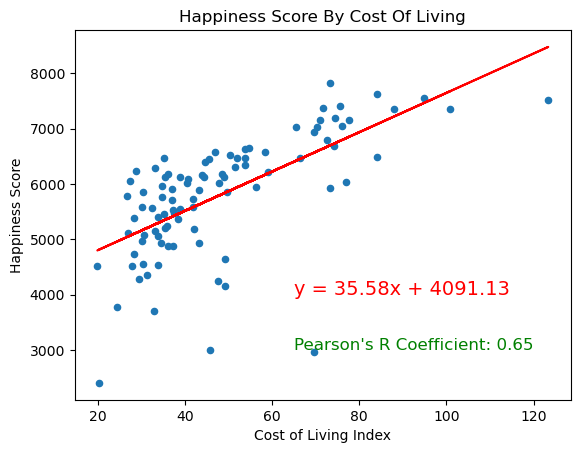

In [55]:
(m, y, r, p, std) = linregress(mHapCosCrim['Cost of Living Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Cost of Living Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Cost of Living Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearson's R Coefficient: {r}")
plt.plot(mHapCosCrim['Cost of Living Index'], yregressLin, color='red')
plt.annotate(equation, (65, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (65, 3000), color='green', size = 12)
plt.title('Happiness Score By Cost Of Living')
fig = plt.gcf()
plt.show()

In [56]:


figureTitle = 'HappinessCostLiving'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


Pearson's R Coefficient: 0.4386302852303171


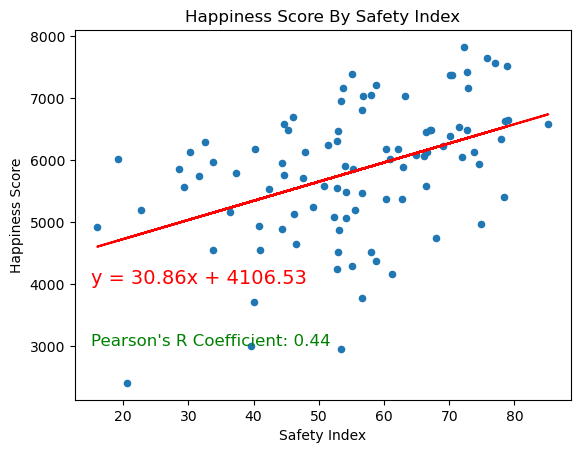

In [57]:
(m, y, r, p, std) = linregress(mHapCosCrim['Safety Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Safety Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Safety Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearson's R Coefficient: {r}")
plt.plot(mHapCosCrim['Safety Index'], yregressLin, color='red')
plt.annotate(equation, (15, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (15, 3000), color='green', size = 12)
plt.title('Happiness Score By Safety Index')
fig = plt.gcf()
plt.show()

In [58]:
figureTitle = 'HappinessSafety'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")

Pearson's R Coefficient: 0.7221735991986103


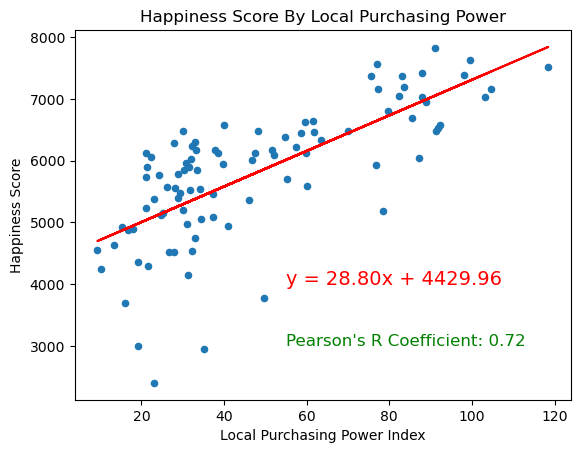

In [59]:
(m, y, r, p, std) = linregress(mHapCosCrim['Local Purchasing Power Index'], mHapCosCrim['Happiness Score'])
yregressLin = m * mHapCosCrim['Local Purchasing Power Index'] + y
mHapCosCrim.plot(kind='scatter', x = 'Local Purchasing Power Index', y = 'Happiness Score')
equation = f"y = {m:.2f}x + {y:.2f}"
print(f"Pearson's R Coefficient: {r}")
plt.plot(mHapCosCrim['Local Purchasing Power Index'], yregressLin, color='red')
plt.annotate(equation, (55, 4000), color='red', size = 14)
plt.annotate(f"Pearson's R Coefficient: {r:.2f}", (55, 3000), color='green', size = 12)
plt.title('Happiness Score By Local Purchasing Power')
fig = plt.gcf()
plt.show()

In [60]:
figureTitle = 'HappinessPurchasing'

# Save the figure
fig.savefig(f"Output/{figureTitle}.png")


In [ ]:
%matplotlib notebook

fig = plt.figure(figsize=(10,8), tight_layout=True)
ax = fig.add_subplot(projection='3d')
x = mHapCosCrim['Safety Index']
xlabel = 'Safety Index'
y = mHapCosCrim['Local Purchasing Power Index']
ylabel = 'Purchasing Power'
z = mHapCosCrim['Happiness Score']
zlabel = 'Happiness Score'
colors = np.random.rand(367)
bin = [3000, 3500, 4000, 4500, 5000 ]
topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = mHapCosCrim['Safety Index'].sort_values(ascending=False).head(1).values[0]
red = mHapCosCrim['Happiness Score']/topHap
green = mHapCosCrim['Local Purchasing Power Index']/topSafety
blue = mHapCosCrim['Safety Index']/topPurch 
triple = (red+ green+blue)/3

ax.scatter(x, y, z, cmap='plasma', c=triple)# xlabel=xlabel, ylabel=ylabel)
ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)
ax.set_zlabel(zlabel, fontsize=14)
plt.subplots_adjust(right=0.5, bottom=0.5)
plt.title('Happiness Score By Safety Index By Purchasing Power', fontsize=16)

plt.show()

In [ ]:
figureTitle = 'UnstandardizedHappinessCostSafety'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
bottomHap = mHapCosCrim['Happiness Score'].sort_values().head(1).values[0]
bottomPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values().head(1).values[0]
bottompSafety = mHapCosCrim['Safety Index'].sort_values().head(1).values[0]


topHap = mHapCosCrim['Happiness Score'].sort_values(ascending=False).head(1).values[0]
topPurch = mHapCosCrim['Local Purchasing Power Index'].sort_values(ascending=False).head(1).values[0]
topSafety = mHapCosCrim['Safety Index'].sort_values(ascending=False).head(1).values[0]

mHapCosCrim['Standardized Happiness'] = (mHapCosCrim['Happiness Score'] - bottomHap) / (topHap - bottomHap)
mHapCosCrim['Standardized Local Purchasing Power'] = (mHapCosCrim['Local Purchasing Power Index'] - bottomPurch) / (topPurch - bottomPurch)
mHapCosCrim['Standardized Safety'] = (mHapCosCrim['Safety Index'] - bottompSafety) / (topSafety - bottompSafety)
mHapCosCrim.head()


In [ ]:
%matplotlib notebook
weightHap = 1
weightPurch = 1
weightSafety = 1

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

# Combine the three metrics (Standardized Happiness, Safety, Purchasing Power) into one metric
mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)

# print(mHapCosCrim)
minimumEquallyWeighted = mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'].min()

# Size of datapoint will increase with distance from origin (0,0,0)
fg = ax.scatter3D(mHapCosCrim['Standardized Safety'], 
                  mHapCosCrim['Standardized Local Purchasing Power'],
                  mHapCosCrim['Standardized Happiness'], 
                  s = 40 * (mHapCosCrim['Equally Weighted Safety, Purchasing, and Happiness'] - minimumEquallyWeighted)**3,
                  cmap='plasma'
                  )

# Labels
ax.set_title('Standardized Happiness Score By Safety Index By Purchasing Power', fontsize=16)
ax.set_xlabel('Standardized Safety Index', fontsize=14)
ax.set_ylabel('Standardized Local Purchasing Power', fontsize=14)
ax.set_zlabel('Standardized Happiness', fontsize=14)

In [ ]:
figureTitle = 'StandardizedHappinessCostSafety'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
mHapCosCrim.head()

In [ ]:
top10EquallyWeighted = mHapCosCrim.sort_values('Equally Weighted Safety, Purchasing, and Happiness', ascending=False).head(10)

In [ ]:
#Equally Weighted
%matplotlib notebook
x = top10EquallyWeighted['Country']
height = top10EquallyWeighted['Equally Weighted Safety, Purchasing, and Happiness']


# collecting countries
countriesOfInterestSet = set()
for q in x:
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Equally Weighted Safety, Purchasing, and Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(2.5, 3)
plt.grid(zorder=0)

plt.show()

In [ ]:
figureTitle = 'EquallyWeightedSafPurchHap'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 2, safety 1
%matplotlib notebook
weightHap = 3
weightPurch = 2
weightSafety = 1
mHapCosCrim['Biased Happiness, Purchasing, then Safety'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Happiness, Purchasing, then Safety', 
                                               ascending=False).head(10)
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Purchasing, then Safety']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Purchasing, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(4.4, 4.9)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasHapPurchSaf'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 3, purch 1, safety 2
%matplotlib notebook
weightHap = 3
weightPurch = 1
weightSafety = 2
mHapCosCrim['Biased Happiness, Safety, then Purchasing'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Happiness, Safety, then Purchasing', 
                                               ascending=False).head(10)
# print(top10Bias[['Country','Biased Happiness, Safety, then Purchasing']])
x = top10Bias['Country']
height = top10Bias['Biased Happiness, Safety, then Purchasing']


# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Happiness, Safety, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Standardized Score', fontsize=14)
plt.ylim(4.7, 5)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasHapSafPurch'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 3, safety 1
%matplotlib notebook
weightHap = 2
weightPurch = 3
weightSafety = 1
mHapCosCrim['Biased Purchasing, Happiness, then Safety'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Purchasing, Happiness, then Safety', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Happiness, then Safety']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Happiness, then Safety', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasPurchHapSaf'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 3, safety 2
%matplotlib notebook
weightHap = 1
weightPurch = 3
weightSafety = 2
mHapCosCrim['Biased Purchasing, Safety, then Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Purchasing, Safety, then Happiness', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Purchasing, Safety, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Purchasing, Safety, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(3.8, 4.8)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasPurchSafHap'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 1, purch 2, safety 3
%matplotlib notebook
weightHap = 1
weightPurch = 2
weightSafety = 3
mHapCosCrim['Biased Safety, Purchasing, then Happiness'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Safety, Purchasing, then Happiness', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Purchasing, then Happiness']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Purchasing, then Happiness', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.2, 4.9)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasSafPurchHap'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
#Happiness 2, purch 1, safety 3
%matplotlib notebook
weightHap = 2
weightPurch = 1
weightSafety = 3
mHapCosCrim['Biased Safety, Happiness, then Purchasing'] = np.sqrt((mHapCosCrim['Standardized Safety'] + weightSafety)**2 + 
                            (mHapCosCrim['Standardized Local Purchasing Power'] * weightPurch)**2 + 
                            (mHapCosCrim['Standardized Happiness'] + weightHap)**2)
top10Bias = mHapCosCrim.sort_values('Biased Safety, Happiness, then Purchasing', 
                                               ascending=False).head(10)
# print(mHapCosCrim.count())
x = top10Bias['Country']
height = top10Bias['Biased Safety, Happiness, then Purchasing']

# collecting countries
for q in x:     
    countriesOfInterestSet.add(q)

fig, ax = plt.subplots()
ax.bar(x, height, zorder=5) 
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.subplots_adjust(top=.85, left=0.15, bottom=0.35)
plt.title('Biased Safety, Happiness, then Purchasing', fontsize=15)
plt.xlabel('Country', fontsize=14)
plt.ylim(4.7, 5)
plt.ylabel('Standardized Score', fontsize=14)
plt.grid(zorder=0)
plt.show()

In [ ]:
figureTitle = 'BiasSafHapPurch'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
gdp_df = pd.read_csv('./Resources/RealGDPGrowthfrom1980across2022.csv', encoding='latin-1')
gdp_df = gdp_df.replace('no data', pd.NA)
# gdp_df = gdp_df.replace('<NA>', pd.NA)
fgdp_df = gdp_df.fillna(0)
print(fgdp_df[fgdp_df['Country']=='Netherlands'])
fgdp_df.head()

In [ ]:
countriesOfInterestSet = sorted(countriesOfInterestSet)
fig, ax = plt.subplots(figsize=(12,10))

fl_fgdp_df = fgdp_df.iloc[:,1:].astype('float')

count = 0
countifs = 0

for x in fgdp_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.scatter(fgdp_df.columns[1:], fl_fgdp_df.iloc[count].tolist(), label=x)
    count += 1

plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 15 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.95, 0))

In [ ]:
figureTitle = 'GDPTop15'

# Save the figure
plt.savefig(f"Output/{figureTitle}.png")

In [ ]:
rolling_df = fl_fgdp_df.rolling(window=5).mean()
fig, ax = plt.subplots(figsize=(12,10))

count = 0
countifs = 0

for x in rolling_df['Country']:
    if x in countriesOfInterestSet:
        countifs += 1
        ax.plot(rolling_df.columns[1:], rolling_df.iloc[count].tolist(), label=x)
    count += 1
plt.subplots_adjust(left=0.1)
plt.title('GDP Of Top 15 Countries Over Time', fontsize=16)
plt.xticks(fgdp_df.columns[1:][::5])
plt.yticks(range(-25, 30, 10))
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Gross Domestic Product (USD)', fontsize = 16)
plt.legend(loc=(0.95, 0))
